# 1- Loading libraries and importing data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from geopy.geocoders import ArcGIS
from plotnine import ggplot , aes

In [ ]:
df = pd.read_csv("database.csv", low_memory=False)

In [ ]:
#df1["Perpetrator Age"]=df1["Perpetrator Age"].convert_dtypes()
df['Perpetrator Age']=df['Perpetrator Age'].fillna(0)
df["Perpetrator Age"] = pd.to_numeric(df["Perpetrator Age"], errors='coerce')
#df1["Perpetrator Age"] = df1["Perpetrator Age"].astype('int')
df.dtypes


Record ID                  int64
Agency Code               object
Agency Name               object
Agency Type               object
City                      object
State                     object
Year                       int64
Month                     object
Incident                   int64
Crime Type                object
Crime Solved              object
Victim Sex                object
Victim Age                 int64
Victim Race               object
Victim Ethnicity          object
Perpetrator Sex           object
Perpetrator Age          float64
Perpetrator Race          object
Perpetrator Ethnicity     object
Relationship              object
Weapon                    object
Victim Count               int64
Perpetrator Count          int64
Record Source             object
dtype: object

In [ ]:
pd.options.display.max_columns = 24
df = pd.concat((df.select_dtypes('number'), df.select_dtypes('object')), axis=1)
df.head()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Crime Solved,Victim Sex,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Record Source
0,1,1980,1,14,15.0,0,0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,January,Murder or Manslaughter,Yes,Male,Native American/Alaska Native,Unknown,Male,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,FBI
1,2,1980,1,43,42.0,0,0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,Murder or Manslaughter,Yes,Male,White,Unknown,Male,White,Unknown,Acquaintance,Strangulation,FBI
2,3,1980,2,30,0.0,0,0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,Murder or Manslaughter,No,Female,Native American/Alaska Native,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,FBI
3,4,1980,1,43,42.0,0,0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,Murder or Manslaughter,Yes,Male,White,Unknown,Male,White,Unknown,Acquaintance,Strangulation,FBI
4,5,1980,2,30,0.0,0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,Murder or Manslaughter,No,Female,Native American/Alaska Native,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,FBI


In [ ]:
df.describe(include='all').round(2)

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Crime Solved,Victim Sex,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Record Source
count,638454.00,638454.00,638454.00,638454.00,638453.00,638454.00,638454.00,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12003,9216,7,1782,51,12,2,2,3,5,3,3,5,3,28,16,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY03030,New York,Municipal Police,Los Angeles,California,July,Murder or Manslaughter,Yes,Male,White,Unknown,Male,White,Unknown,Unknown,Handgun,FBI
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38416,38416,493026,44511,99783,58696,629338,448172,494125,317422,368303,399541,218243,446410,273013,317484,616647
mean,319227.50,1995.80,22.97,35.03,20.32,0.12,0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,184305.94,9.93,92.15,41.63,17.89,0.54,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,159614.25,1987.00,1.00,22.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,319227.50,1995.00,2.00,30.00,21.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,478840.75,2004.00,10.00,42.00,31.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.


> For numeric data:
- count : number of records 638454 record
- mean : the avreage of the numbers in each column.     
ex: avreage victims ages if 35
- std : the standard deviation, how much the members of the group differ from the mean value for the group.  
ex: standard deviation of Perpetrator Age 17.
- min :  for the minimum value in the column
ex: the minimum year 1980
- 25% : for the value that represent 25% of the  numbers in the data(as a number not as a frequently repeated)
ex:  the 25% year is  1987
- 50% : for the value that represent 50% of the  numbers in the data
ex:  the 50% year is  1995
- 75% : for the value that represent 75% of the  numbers in the data
ex: the 75% year is 2004
- max : for the maximum value in the data
ex: the max year is 2014
> objects:
- top :  is the most common value
ex: most common value in crime tybe is Murder or Manslaughter
- unique : number of unique values in each column
ex: number of unique values in Relationship	is 28
- freq: is the most common value’s frequency
ex: tybe of crime Murder or Manslaughter was mentioned 629338 times

# 2- cleaning data

- the id wont affect the data in anything
- victim and criminal count also meaningless

In [ ]:
#df =df.drop(["Record ID","Perpetrator Count","Victim Count"], axis=0, inplace=True)
#del df['Record ID']
df = df.drop("Record ID", 1)
df = df.drop("Victim Count", 1)
df = df.drop("Perpetrator Count", 1)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,Year,Incident,Victim Age,Perpetrator Age,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Crime Solved,Victim Sex,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Record Source
0,1980,1,14,15.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,January,Murder or Manslaughter,Yes,Male,Native American/Alaska Native,Unknown,Male,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,FBI
1,1980,1,43,42.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,Murder or Manslaughter,Yes,Male,White,Unknown,Male,White,Unknown,Acquaintance,Strangulation,FBI
2,1980,2,30,0.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,Murder or Manslaughter,No,Female,Native American/Alaska Native,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,FBI
3,1980,1,43,42.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,Murder or Manslaughter,Yes,Male,White,Unknown,Male,White,Unknown,Acquaintance,Strangulation,FBI
4,1980,2,30,0.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,Murder or Manslaughter,No,Female,Native American/Alaska Native,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,2014,1,30,0.0,WY01500,Park County,Sheriff,Park,Wyoming,January,Murder or Manslaughter,No,Male,White,Hispanic,Unknown,Unknown,Unknown,Unknown,Handgun,FBI
638450,2014,1,62,57.0,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,June,Murder or Manslaughter,Yes,Male,White,Unknown,Male,White,Unknown,Acquaintance,Handgun,FBI
638451,2014,1,0,22.0,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,September,Murder or Manslaughter,Yes,Female,Asian/Pacific Islander,Unknown,Female,Asian/Pacific Islander,Unknown,Daughter,Suffocation,FBI
638452,2014,1,55,31.0,WY01800,Sublette County,Sheriff,Sublette,Wyoming,December,Murder or Manslaughter,Yes,Male,White,Not Hispanic,Male,White,Not Hispanic,Stranger,Knife,FBI


- renaming any thing has Perpetrator because its difficult to write everytime and pronounce actually

In [ ]:

df = df.rename(columns = {'Perpetrator Age':'criminalAge', 'Perpetrator Sex':'criminalSex','Perpetrator Race': 'criminalRace','Perpetrator Ethnicity':'criminal_ethnicity'},errors="raise" )
df

,Year,Incident,Victim Age,criminalAge,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Crime Solved,Victim Sex,Victim Race,Victim Ethnicity,criminalSex,criminalRace,criminal_ethnicity,Relationship,Weapon,Record Source
0,1980,1,14,15.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,January,Murder or Manslaughter,Yes,Male,Native American/Alaska Native,Unknown,Male,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,FBI
1,1980,1,43,42.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,Murder or Manslaughter,Yes,Male,White,Unknown,Male,White,Unknown,Acquaintance,Strangulation,FBI
2,1980,2,30,0.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,Murder or Manslaughter,No,Female,Native American/Alaska Native,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,FBI
3,1980,1,43,42.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,Murder or Manslaughter,Yes,Male,White,Unknown,Male,White,Unknown,Acquaintance,Strangulation,FBI
4,1980,2,30,0.0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,Murder or Manslaughter,No,Female,Native American/Alaska Native,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,2014,1,30,0.0,WY01500,Park County,Sheriff,Park,Wyoming,January,Murder or Manslaughter,No,Male,White,Hispanic,Unknown,Unknown,Unknown,Unknown,Handgun,FBI
638450,2014,1,62,57.0,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,June,Murder or Manslaughter,Yes,Male,White,Unknown,Male,White,Unknown,Acquaintance,Handgun,FBI
638451,2014,1,0,22.0,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,September,Murder or Manslaughter,Yes,Female,Asian/Pacific Islander,Unknown,Female,Asian/Pacific Islander,Unknown,Daughter,Suffocation,FBI
638452,2014,1,55,31.0,WY01800,Sublette County,Sheriff,Sublette,Wyoming,December,Murder or Manslaughter,Yes,Male,White,Not Hispanic,Male,White,Not Hispanic,Stranger,Knife,FBI


- Find and remove duplicate values.

In [ ]:
df = df.apply(lambda x: x.astype(str).str.lower()).drop_duplicates( keep='first')
df.dtypes

Year                  object
Incident              object
Victim Age            object
criminalAge           object
Agency Code           object
Agency Name           object
Agency Type           object
City                  object
State                 object
Month                 object
Crime Type            object
Crime Solved          object
Victim Sex            object
Victim Race           object
Victim Ethnicity      object
criminalSex           object
criminalRace          object
criminal_ethnicity    object
Relationship          object
Weapon                object
Record Source         object
dtype: object

In [ ]:
df["criminalAge"] = pd.to_numeric(df["criminalAge"], errors='coerce')
df["Year"] = pd.to_numeric(df["Year"], errors='coerce')
df["Incident"] = pd.to_numeric(df["Incident"], errors='coerce')
df["Victim Age"] = pd.to_numeric(df["Victim Age"], errors='coerce')
df.dtypes

Year                    int64
Incident                int64
Victim Age              int64
criminalAge           float64
Agency Code            object
Agency Name            object
Agency Type            object
City                   object
State                  object
Month                  object
Crime Type             object
Crime Solved           object
Victim Sex             object
Victim Race            object
Victim Ethnicity       object
criminalSex            object
criminalRace           object
criminal_ethnicity     object
Relationship           object
Weapon                 object
Record Source          object
dtype: object

- Handle missing data (Nan and None values)

In [ ]:
df.dropna(how="any", inplace=True)
df = df.fillna("", inplace=False)
df

,Year,Incident,Victim Age,criminalAge,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Crime Solved,Victim Sex,Victim Race,Victim Ethnicity,criminalSex,criminalRace,criminal_ethnicity,Relationship,Weapon,Record Source
0,1980,1,14,15.0,ak00101,anchorage,municipal police,anchorage,alaska,january,murder or manslaughter,yes,male,native american/alaska native,unknown,male,native american/alaska native,unknown,acquaintance,blunt object,fbi
1,1980,1,43,42.0,ak00101,anchorage,municipal police,anchorage,alaska,march,murder or manslaughter,yes,male,white,unknown,male,white,unknown,acquaintance,strangulation,fbi
2,1980,2,30,0.0,ak00101,anchorage,municipal police,anchorage,alaska,march,murder or manslaughter,no,female,native american/alaska native,unknown,unknown,unknown,unknown,unknown,unknown,fbi
3,1980,1,43,42.0,ak00101,anchorage,municipal police,anchorage,alaska,april,murder or manslaughter,yes,male,white,unknown,male,white,unknown,acquaintance,strangulation,fbi
4,1980,2,30,0.0,ak00101,anchorage,municipal police,anchorage,alaska,april,murder or manslaughter,no,female,native american/alaska native,unknown,unknown,unknown,unknown,unknown,unknown,fbi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,2014,1,30,0.0,wy01500,park county,sheriff,park,wyoming,january,murder or manslaughter,no,male,white,hispanic,unknown,unknown,unknown,unknown,handgun,fbi
638450,2014,1,62,57.0,wy01700,sheridan county,sheriff,sheridan,wyoming,june,murder or manslaughter,yes,male,white,unknown,male,white,unknown,acquaintance,handgun,fbi
638451,2014,1,0,22.0,wy01701,sheridan,municipal police,sheridan,wyoming,september,murder or manslaughter,yes,female,asian/pacific islander,unknown,female,asian/pacific islander,unknown,daughter,suffocation,fbi
638452,2014,1,55,31.0,wy01800,sublette county,sheriff,sublette,wyoming,december,murder or manslaughter,yes,male,white,not hispanic,male,white,not hispanic,stranger,knife,fbi


In [ ]:
df.isnull().values.any()

False

> handling outlairs
-  i dropped any age less than 1 in victims and higher than 90
- and less than 5 and higher than 90 in criminals
- incident is the number of  crime eevents that occurred in a gevin area less than 100

In [ ]:
df.drop(df.index[df['Victim Age'] <= 0], inplace = True)
df.drop(df.index[df['criminalAge'] <= 5 ], inplace = True)
df.drop(df.index[df['Incident'] > 100 ], inplace = True)
df.drop(df.index[df['Victim Age'] >= 90], inplace = True)
df.drop(df.index[df['criminalAge'] >= 90 ], inplace = True)

In [ ]:
df

,Year,Incident,Victim Age,criminalAge,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Crime Solved,Victim Sex,Victim Race,Victim Ethnicity,criminalSex,criminalRace,criminal_ethnicity,Relationship,Weapon,Record Source
0,1980,1,14,15.0,ak00101,anchorage,municipal police,anchorage,alaska,january,murder or manslaughter,yes,male,native american/alaska native,unknown,male,native american/alaska native,unknown,acquaintance,blunt object,fbi
1,1980,1,43,42.0,ak00101,anchorage,municipal police,anchorage,alaska,march,murder or manslaughter,yes,male,white,unknown,male,white,unknown,acquaintance,strangulation,fbi
3,1980,1,43,42.0,ak00101,anchorage,municipal police,anchorage,alaska,april,murder or manslaughter,yes,male,white,unknown,male,white,unknown,acquaintance,strangulation,fbi
5,1980,1,30,36.0,ak00101,anchorage,municipal police,anchorage,alaska,may,murder or manslaughter,yes,male,white,unknown,male,white,unknown,acquaintance,rifle,fbi
6,1980,2,42,27.0,ak00101,anchorage,municipal police,anchorage,alaska,may,murder or manslaughter,yes,female,native american/alaska native,unknown,male,black,unknown,wife,knife,fbi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638446,2014,1,76,48.0,wy01300,natrona county,sheriff,natrona,wyoming,september,murder or manslaughter,yes,female,white,not hispanic,male,white,not hispanic,mother,handgun,fbi
638447,2014,1,21,22.0,wy01301,casper,municipal police,natrona,wyoming,june,murder or manslaughter,yes,female,black,not hispanic,male,white,unknown,girlfriend,handgun,fbi
638448,2014,1,29,67.0,wy01301,casper,municipal police,natrona,wyoming,august,murder or manslaughter,yes,male,native american/alaska native,unknown,male,black,unknown,friend,firearm,fbi
638450,2014,1,62,57.0,wy01700,sheridan county,sheriff,sheridan,wyoming,june,murder or manslaughter,yes,male,white,unknown,male,white,unknown,acquaintance,handgun,fbi


In [ ]:
df.describe(include='all').round(2)

,Year,Incident,Victim Age,criminalAge,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Crime Solved,Victim Sex,Victim Race,Victim Ethnicity,criminalSex,criminalRace,criminal_ethnicity,Relationship,Weapon,Record Source
count,395474.00,395474.00,395474.00,395474.00,395474,395474,395474,395474,395474,395474,395474,395474,395474,395474,395474,395474,395474,395474,395474,395474,395474
unique,NaN,NaN,NaN,NaN,11446,8774,7,1771,51,12,2,2,3,5,3,3,5,3,28,16,2
top,NaN,NaN,NaN,NaN,ca01942,los angeles,municipal police,los angeles,california,july,murder or manslaughter,yes,male,white,unknown,male,white,unknown,acquaintance,handgun,fbi
freq,NaN,NaN,NaN,NaN,15201,17507,294771,25156,59784,36458,388479,394995,296508,209953,218241,352618,196773,218334,117888,191656,391115
mean,1995.22,7.21,33.10,30.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.97,13.99,15.92,12.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1980.00,0.00,1.00,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1987.00,1.00,22.00,21.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1994.00,2.00,30.00,28.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2004.00,6.00,42.00,37.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3- Pandas’ aggregate functions:

1-  number of male and female criminals and victims
> and as a result males are most likely to be victims and criminals

In [ ]:
print("-> number of male and female criminals : ")
print(df['criminalSex'].value_counts())
print("-> number of male and female victims : ")
print(df['Victim Sex'].value_counts())

-> number of male and female criminals : 
male       352618
female      42411
unknown       445
Name: criminalSex, dtype: int64
-> number of male and female victims : 
male       296508
female      98880
unknown        86
Name: Victim Sex, dtype: int64


In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year           1994.0
Incident          2.0
Victim Age       30.0
criminalAge      28.0
dtype: float64

-> relationship between the victim and criminal in each state

In [ ]:
states = df.groupby(['State'])
states['Relationship'].value_counts(normalize=True)#.loc['kansas']

State    Relationship   
alabama  acquaintance       0.368931
         stranger           0.126918
         unknown            0.113208
         friend             0.058742
         wife               0.050566
                              ...   
wyoming  stepson            0.007547
         common-law wife    0.005660
         employer           0.005660
         sister             0.001887
         stepdaughter       0.001887
Name: Relationship, Length: 1376, dtype: float64

-> the median and mean of ages of victims and criminals in each state

In [ ]:
states[['Victim Age', 'criminalAge']].agg(['median','mean'])

Victim Age            criminalAge           
                         median       mean      median       mean
State                                                            
alabama                    32.0  34.935975        29.0  32.467044
alaska                     31.0  32.858730        28.0  30.701587
arizona                    30.5  33.535398        28.0  31.723894
arkansas                   32.0  34.975136        29.0  32.003267
california                 29.0  31.987706        26.0  29.719607
colorado                   30.0  32.929554        29.0  31.711338
connecticut                29.0  32.434164        26.0  29.915561
delaware                   30.0  33.673913        26.0  30.535024
district of columbia       28.0  31.413834        25.0  28.330012
florida                    31.0  34.374606        29.0  32.507610
georgia                    31.0  33.556476        28.0  31.575149
hawaii                     34.0  36.037549        31.0  33.473320
idaho                      31.0  34.054990        31.0  33.141548
illinois                   27.0  30.214152        25.0  28.090159
indiana                    30.0  32.947647        28.0  30.849265
iowa                       31.0  33.597773        29.0  31.920668
kansas                     30.0  32.871997        28.0  31.022280
kentucky                   34.0  36.218555        32.0  34.184932
louisiana                  29.0  32.086280        26.0  29.917456
maine                      34.0  36.734057        32.0  33.656716
maryland                   29.0  31.856742        26.0  29.083621
massachusetts              29.0  32.710069        26.0  29.876966
michigan                   30.0  32.673809        27.0  30.543991
minnesota                  30.0  32.928595        27.0  30.502149
mississippi                31.0  34.448249        28.0  31.232782
missouri                   30.0  33.052167        28.0  30.842028
montana                    34.5  35.530303        31.0  33.992424
nebraska                   30.0  32.563208        29.0  31.839623
nevada                     33.0  35.006778        30.0  32.980514
new hampshire              33.0  36.090385        31.0  33.782692
new jersey                 30.0  33.282642        26.0  29.638298
new mexico                 31.0  33.270432        28.0  30.723256
new york                   29.0  32.824713        26.0  29.503389
north carolina             31.0  34.393087        29.0  31.799273
north dakota               33.0  35.641791        32.0  33.414179
ohio                       30.0  33.083411        28.0  31.010524
oklahoma                   32.0  34.181380        28.0  31.639433
oregon                     32.0  34.775108        31.0  33.191312
pennsylvania               29.0  32.981194        27.0  30.606147
rhodes island              29.0  33.044619        28.0  29.980315
south carolina             32.0  34.826100        29.0  31.894275
south dakota               29.0  33.443272        29.0  32.269129
tennessee                  31.0  34.247616        28.0  31.329775
texas                      30.0  32.740657        28.0  30.870352
utah                       30.0  32.056312        29.0  31.560644
vermont                    34.0  37.148571        32.0  35.325714
virginia                   30.0  33.907363        28.0  31.356291
washington                 31.0  33.851966        29.0  31.811624
west virginia              34.0  36.882732        32.0  34.355218
wisconsin                  28.0  31.585991        26.0  29.473421
wyoming                    30.5  33.269811        29.5  32.490566

-> which is the most state that black ppl mostly get killed

In [ ]:
race = df.groupby(['Victim Race'])
race['State'].value_counts().loc["black"]

State
california              16006
texas                   13975
michigan                10966
illinois                10464
georgia                  9414
new york                 9070
pennsylvania             8546
louisiana                7963
north carolina           7833
ohio                     6976
virginia                 6386
maryland                 6304
tennessee                6280
florida                  6259
south carolina           6009
alabama                  5128
missouri                 4723
new jersey               4545
mississippi              3826
indiana                  3091
arkansas                 2856
wisconsin                2226
oklahoma                 1835
district of columbia     1541
connecticut              1224
kentucky                 1222
massachusetts            1123
minnesota                 945
washington                945
arizona                   854
nevada                    844
colorado                  781
kansas                    706
dela

In [ ]:
total = df['State'].value_counts()
black = race['State'].value_counts().loc["black"]
#white = race['State'].value_counts().loc["white"]
#asian = race['State'].value_counts().loc["asian/pacific islander"]
#native = race['State'].value_counts().loc["native american/alaska native"]

killed = pd.concat([total,black],axis= 'columns',sort =False)
#killed.rename(columns = {'total': 'total #ofppl killed', 'black': 'black'},inplace = True)
killed

,State,State
california,59784,16006
texas,42276,13975
new york,18735,9070
michigan,16708,10966
pennsylvania,15846,8546
illinois,15517,10464
florida,14586,6259
north carolina,14582,7833
georgia,14245,9414
ohio,12828,6976


# 4-Data visualization:

1- the homicides decreses each year

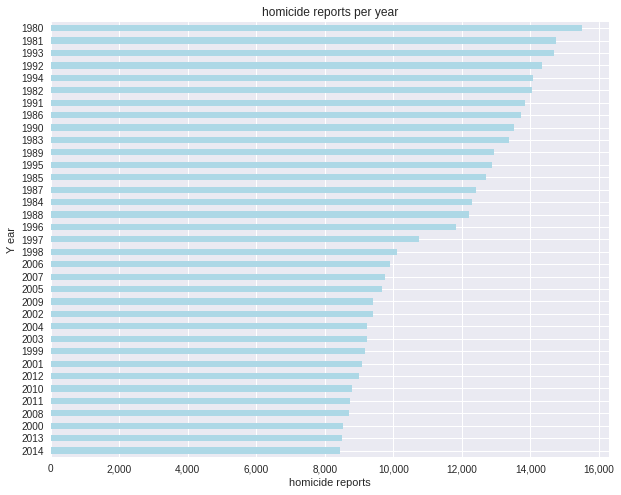

In [ ]:
year_df = df['Year'].value_counts(ascending=True)
fig=plt.figure(figsize=(10, 8))
plt.title("homicide reports per year")
plt.xlabel("homicide reports")
plt.ylabel("Y ear")
ax = year_df.plot(kind='barh',color='lightblue' )
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


[]

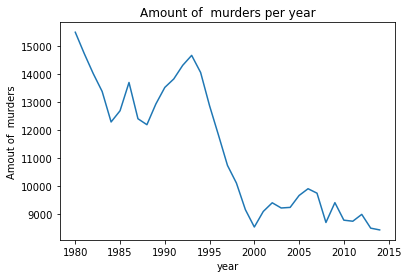

In [ ]:
plt.title("Amount of  murders per year")
plt.xlabel("year")
plt.ylabel("Amout of  murders")
years_Counts = df["Year"].value_counts(sort=False)
p =sns.lineplot(data=years_Counts)
p.plot()

2- white people are most likely to get killed

Text(0, 0.5, '')

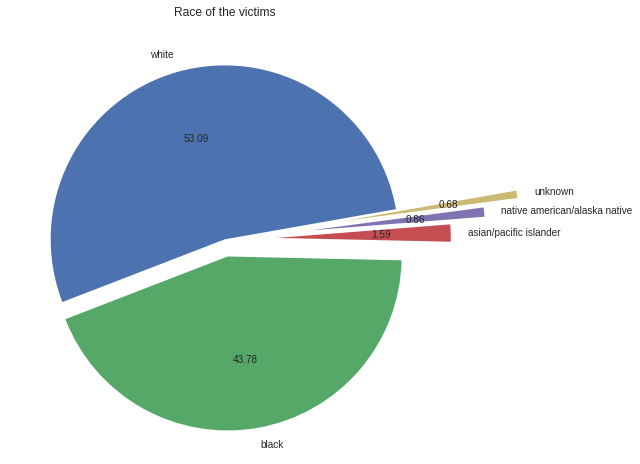

In [ ]:
#Race of Victims
race = pd.DataFrame(df, columns = ['Victim Race'])
count_race = race.stack().value_counts()
ax = count_race.plot(kind = 'pie',
                              title = 'Race of the victims',
                              startangle = 10,
                              autopct='%.2f',
                              explode=(0, 0.1, 0.3, 0.5, 0.7),
                                figsize=(10, 8))
ax.set_ylabel('')

also white ppl are most likely to kill

Text(0, 0.5, '')

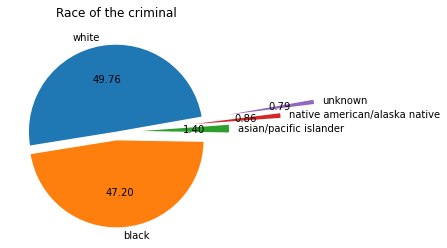

In [ ]:
race = pd.DataFrame(df, columns = ['criminalRace'])
count_race = race.stack().value_counts()
ax = count_race.plot(kind = 'pie',
                              title = 'Race of the criminal',
                              startangle = 10,
                              autopct='%.2f',
                              explode=(0, 0.1, 0.3, 0.9, 1.3))
ax.set_ylabel('')

3- ages of murderers

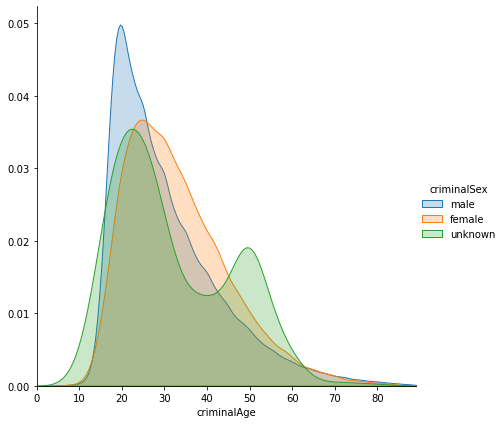

In [ ]:
Facetgrid = sns.FacetGrid(df,hue='criminalSex',height=6)
Facetgrid.map(sns.kdeplot,'criminalAge',shade=True)
Facetgrid.set(xlim=(0,df['criminalAge'].max()))
Facetgrid.add_legend()

4- homicides for each month and apparently july has the highest rate of crime which means the higher the temperature the higher the crime rate

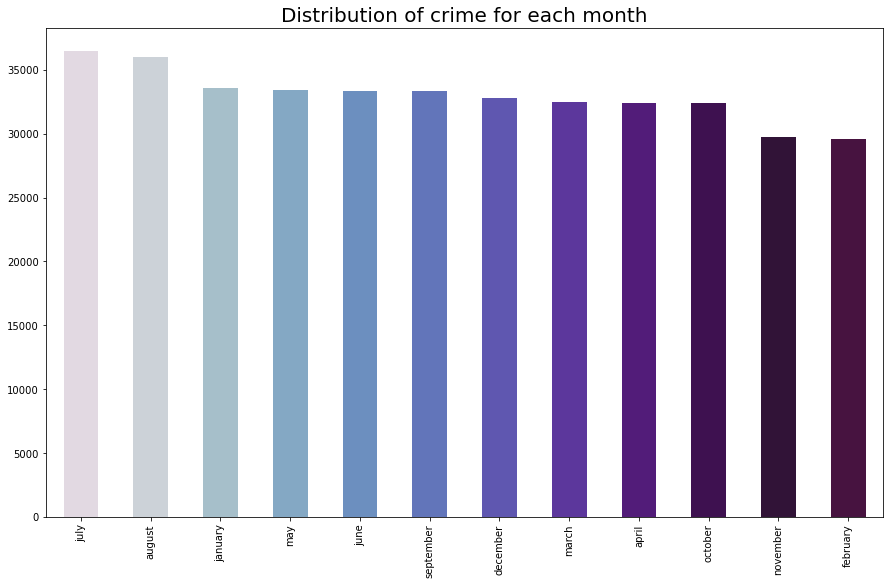

In [ ]:
import warnings
warnings.filterwarnings('ignore')

color = plt.cm.twilight(np.linspace(0, 5, 100))
df['Month'].value_counts().plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of crime for each month', fontsize = 20)
plt.show()

5- know who u say hi to cause he might kill u,
as u can see in the plot

Text(0, 0.5, '')

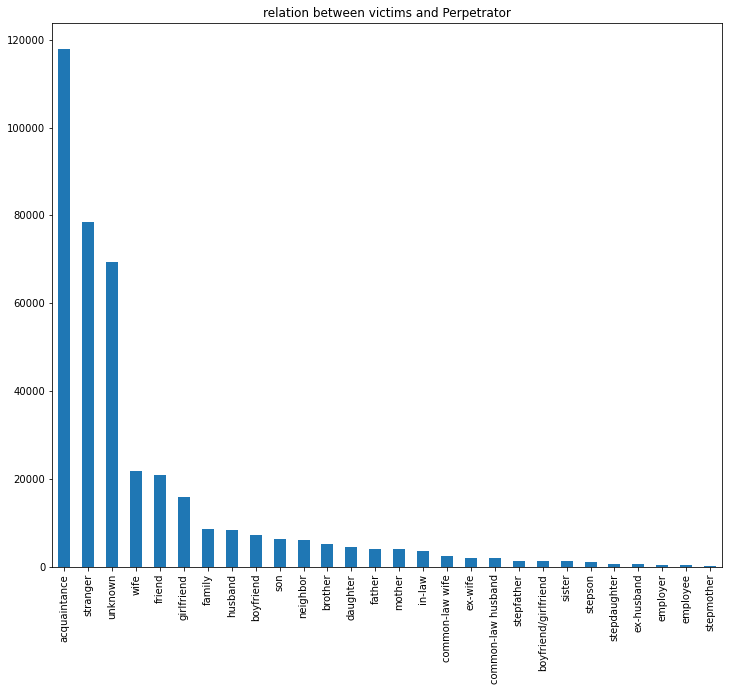

In [ ]:
solved = pd.DataFrame(df, columns = ['Relationship'])
resolution = solved.stack().value_counts()
ax = resolution.plot(kind = 'bar',fontsize=10,  width=0.5,  figsize=(12, 10), title='relation between victims and Perpetrator')
ax.set_ylabel('')

6- california has the highest crime rate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


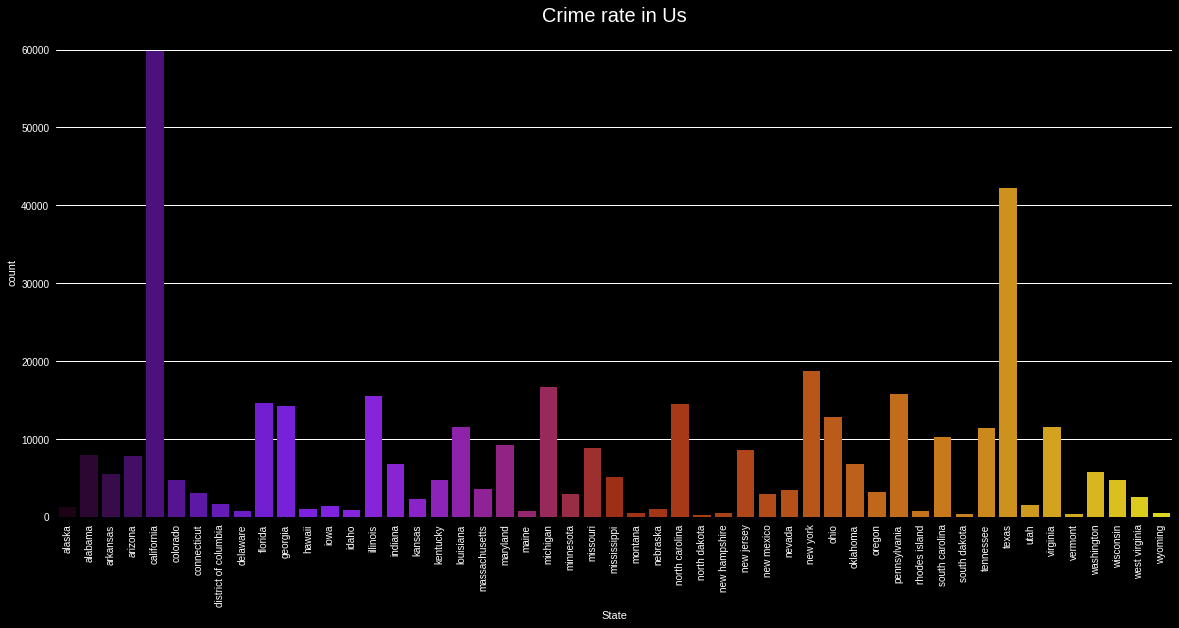

In [ ]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(df['State'], palette = 'gnuplot')

plt.title('Crime rate in Us', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

7- handgun is the most used weapon

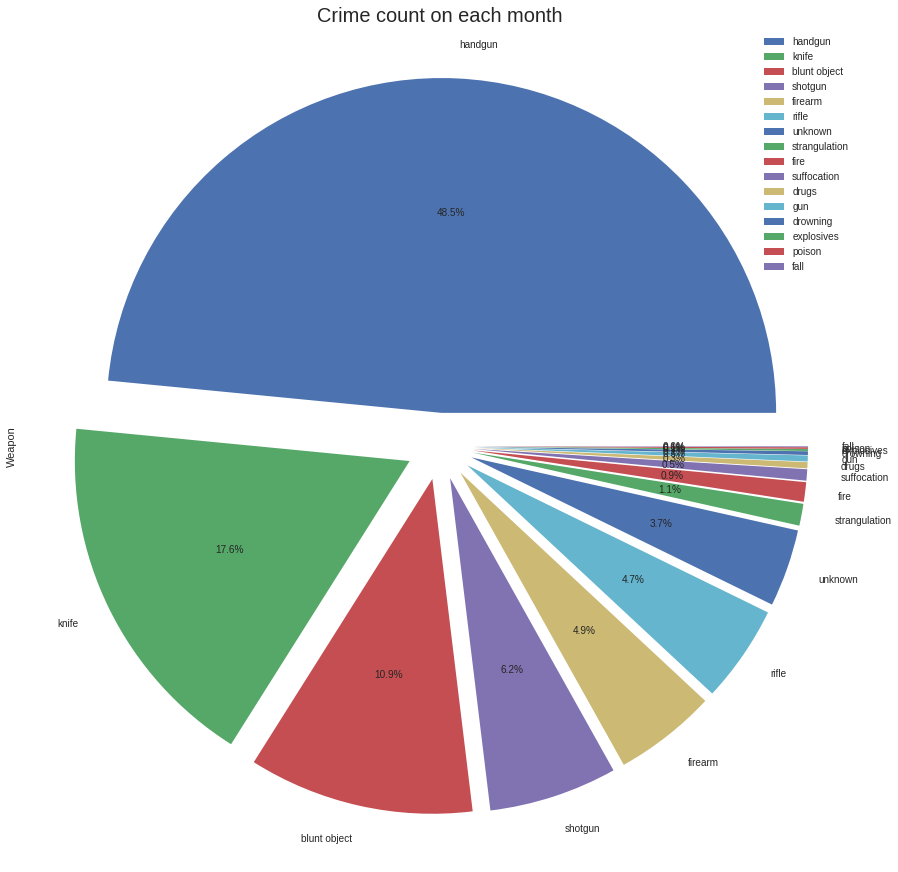

In [ ]:
plt.style.use('seaborn')

df['Weapon'].value_counts().plot.pie(figsize = (15, 18) ,
                                     explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),
                                     legend  = True ,
                                     autopct='%1.1f%%',
                                     fontsize = 10
                                     )


plt.title('Crime count on each month',fontsize =20)

plt.xticks(rotation = 90)
plt.show()

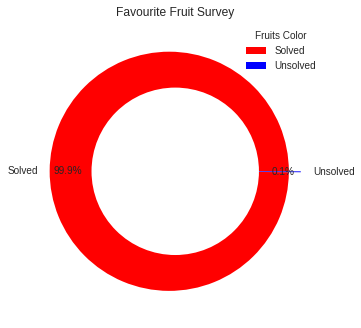

In [ ]:
sizes = df['Crime Solved'].value_counts()

# Setting labels for items in Chart
labels = ['Solved','Unsolved']

# colors
colors = ['#FF0000', '#0000FF']

# explosion
explode = (0.05, 0.05)

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode= explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('solved and unsolved crimes')

# Add Legends
plt.legend(labels, loc="upper right", title="Fruits Color")

# Displaying Chart
plt.show()